# Knn graphs 

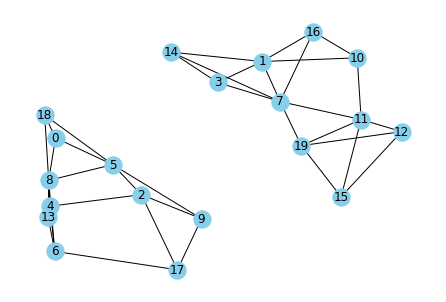

In [7]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import networkx as nx

# Generating some sample data
data = np.random.rand(20, 2)  # Replace this with your dataset

# Specify the number of nearest neighbors (k)
k = 3

# Finding k-nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='ball_tree').fit(data)
distances, indices = nbrs.kneighbors(data)

# Creating a kNN graph
G = nx.Graph()

# Add nodes to the graph
for i in range(len(data)):
    G.add_node(i)

# Add edges to the graph based on k-nearest neighbors
for i, neighbors in zip(range(len(data)), indices):
    for neighbor in neighbors[1:]:  # Start from index 1 to avoid self as the nearest neighbor
        G.add_edge(i, neighbor)

# Visualization (optional)
import matplotlib.pyplot as plt

pos = {i: data[i] for i in range(len(data))}  # Define positions for nodes
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue')
plt.show()


In [3]:
data

array([[0.83476675, 0.61451645],
       [0.5223649 , 0.52665204],
       [0.35159764, 0.60015856],
       [0.71965809, 0.52260619],
       [0.38132704, 0.12825431],
       [0.26773148, 0.69786656],
       [0.92257558, 0.26971753],
       [0.6175948 , 0.34460467],
       [0.35185296, 0.78637091],
       [0.97313266, 0.69598214],
       [0.18368992, 0.14065157],
       [0.46644421, 0.68529776],
       [0.33200727, 0.01197296],
       [0.08641556, 0.87677641],
       [0.25435828, 0.0533641 ],
       [0.80318917, 0.48584212],
       [0.40100867, 0.95446986],
       [0.41910108, 0.39686066],
       [0.35075552, 0.14347024],
       [0.93815983, 0.22520643]])

# knn sampling 

In [8]:
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Generate a sample dataset (replace this with your dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Initialize k for nearest neighbors
k = 5

# Fitting the kNN model to find the nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k + 1).fit(X)
distances, indices = nbrs.kneighbors(X)

# Choose samples that best represent their neighborhoods
sampled_indices = []
for i, neighbors in enumerate(indices):
    # Choose the central point among neighbors
    sampled_indices.append(neighbors[k // 2])

# Select the sampled data points
sampled_data = X[sampled_indices]
sampled_labels = y[sampled_indices]

# Now 'sampled_data' and 'sampled_labels' contain the selected representative samples


Yes, the provided code demonstrates how to perform k-Nearest Neighbors (kNN) sampling to create a sample from a population or dataset. The process involves identifying representative samples by selecting points that are considered to best describe their local neighborhoods.

Here's a breakdown of the code's functionality:

1. **Dataset Generation:**
   - A sample dataset is generated using the `make_classification` function from `scikit-learn`. This dataset is used for demonstration purposes.

2. **Nearest Neighbors Model:**
   - The `NearestNeighbors` model is used to compute the nearest neighbors for each data point in the dataset. This process identifies the k-nearest neighbors for each point.

3. **Sampling Process:**
   - The code loops through the dataset and selects a representative sample by choosing the central point among the k-nearest neighbors. In this case, it selects the central neighbor among the five nearest neighbors (k=5).

4. **Resulting Sample:**
   - The resulting `sampled_data` and `sampled_labels` contain the representative samples and their corresponding labels, forming a smaller subset of the original dataset.

This sampled subset aims to capture the essential characteristics and patterns present in the original dataset, making it potentially suitable for various analyses, modeling, or machine learning tasks, while being computationally more manageable compared to the full dataset. 

Remember, this is a basic example, and in a real scenario, the choice of 'k' and the sampling strategy might be more involved and tailored to specific requirements or characteristics of the dataset.

In [13]:
import pandas as pd

In [16]:
df=pd.concat([pd.DataFrame(X),pd.DataFrame(y)], axis = 1)

In [17]:
df.shape

(1000, 21)

In [20]:
df_knn_sampled = pd.concat([pd.DataFrame(sampled_data),pd.DataFrame(sampled_labels)], axis = 1)

In [22]:
df_knn_sampled.shape

(1000, 21)